In [1]:
from model import InferenceModel

model_path = './models/LAS_number_enclstm3_declstm3_3440.pt'
inference_model = InferenceModel(model_path)

In [2]:
from glob import glob
import os

IMG_DIR = "./dataset/number/image"
LABEL_DIR = "./dataset/number/label"

img_paths = []
img_paths += glob(os.path.join(IMG_DIR, '*.jpg'))
img_paths += glob(os.path.join(IMG_DIR, '*.jpeg'))
img_paths += glob(os.path.join(IMG_DIR, '*.png'))
img_paths = sorted(img_paths)
label_paths = sorted(glob(os.path.join(LABEL_DIR, '*.txt')))

print('len(img_paths) :', len(img_paths))
print(len(img_paths) == len(label_paths))

len(img_paths) : 1977
True


51.55


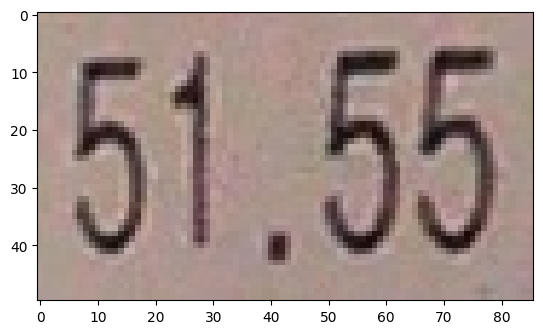

In [4]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(img_paths[0])
s, _ = inference_model(img, is_bgr=True, use_beam=True)
print(s)

plt.imshow(img[...,::-1])

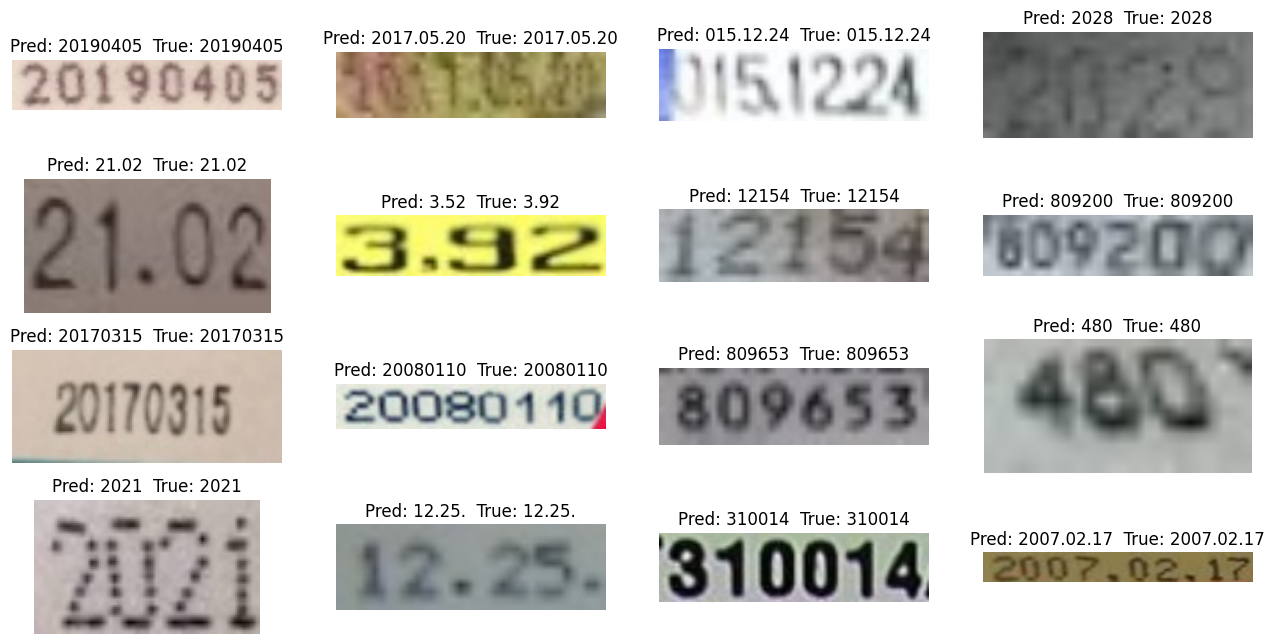

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import re

np.random.seed(8)
r_idx = np.random.randint(0,len(img_paths), size=[16])
img_paths_ = [img_paths[r] for r in r_idx]
label_paths_ = [label_paths[r] for r in r_idx]
_, ax = plt.subplots(4, 4, figsize=(16, 8))

for i, (img_path, label_path) in enumerate(zip(img_paths_, label_paths_)):
    img = cv2.imread(img_path)
    with open(label_path, 'r') as f:
        label = re.sub(' ', '', f.read())
    
    s, att = inference_model(img, is_bgr=True, use_beam=True)
    
    img = cv2.resize(img, [int(img.shape[1]/img.shape[0]*64), 64])[..., ::-1]
    
    title = f"Pred: {s}  True: {label}"
    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(title)
    ax[i // 4, i % 4].axis("off")
        
# plt.savefig('./temp/savef_plt.jpg')
plt.show()